In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [33]:
df = pd.read_csv('data_hindalco.csv')
df.head()

,date,close,high,low,open,volume,instrument
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO


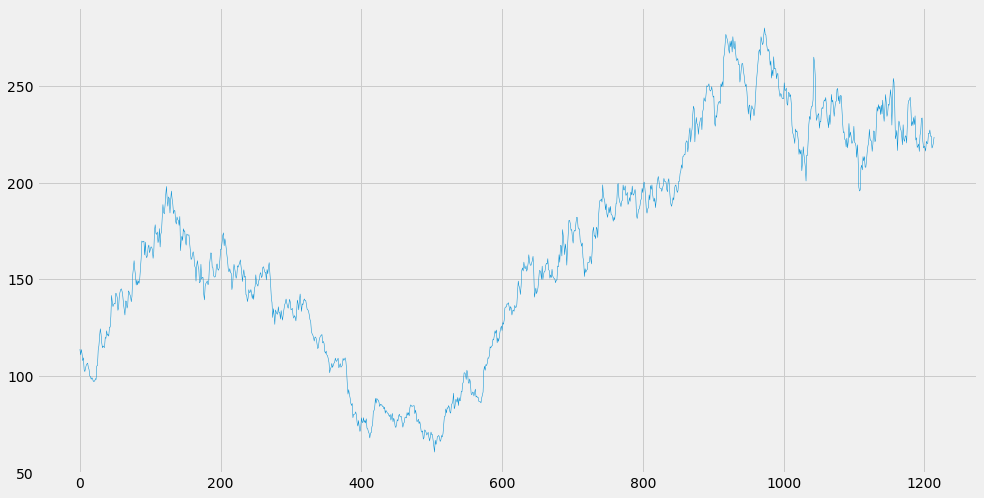

In [34]:
plt.figure(figsize=(15,8))
plt.plot(df['close'] , linewidth = 0.5)
        
        

In [50]:
SMA50 = pd.DataFrame()
SMA50['Price'] = df['close'].rolling(window = 10).mean().shift()
SMA200 = pd.DataFrame()
SMA200['Price'] = df['close'].rolling(window = 15).mean().shift()

Data = pd.DataFrame()
Data['Price'] = df['close']
Data['SMA50'] = SMA50['Price']
Data['SMA200'] = SMA200['Price']
Data['Funds'] = 100000

In [51]:
def buy_sell_signal(data):
  buy_signal = []
  sell_signal = []
  open_position = []
  funds = [100000]*len(data)
  lastFunds = 100000
  flag = 0 #flag 0 for sell  and flag = 1 for buy
  for i in range((len(data))):
    if data['SMA50'][i] > data['SMA200'][i]:
      
      if flag == 0:
        flag = 1
        buy_signal.append(data['Price'][i])
        last_pos = lastFunds/data['Price'][i]
        funds[i] = lastFunds
        open_position.append(last_pos)
        sell_signal.append(np.NaN)
      else:
        buy_signal.append(np.NaN)
        lastFunds = data['Price'][i]*last_pos
        funds[i] = lastFunds
        open_position.append(last_pos)
        sell_signal.append(np.NaN)

    elif data['SMA50'][i] < data['SMA200'][i]:

      if flag == 1:
        flag = 0
        buy_signal.append(np.NaN)
        lastFunds = data['Price'][i]*last_pos
        funds[i] = lastFunds
        open_position.append(0)
        sell_signal.append(data['Price'][i])
      else:
        buy_signal.append(np.NaN)
        funds[i] = lastFunds
        open_position.append(0)
        sell_signal.append(np.NaN)

    else:
      buy_signal.append(np.NaN)
      open_position.append(0)
      sell_signal.append(np.NaN)

  return buy_signal , sell_signal , open_position , funds, flag


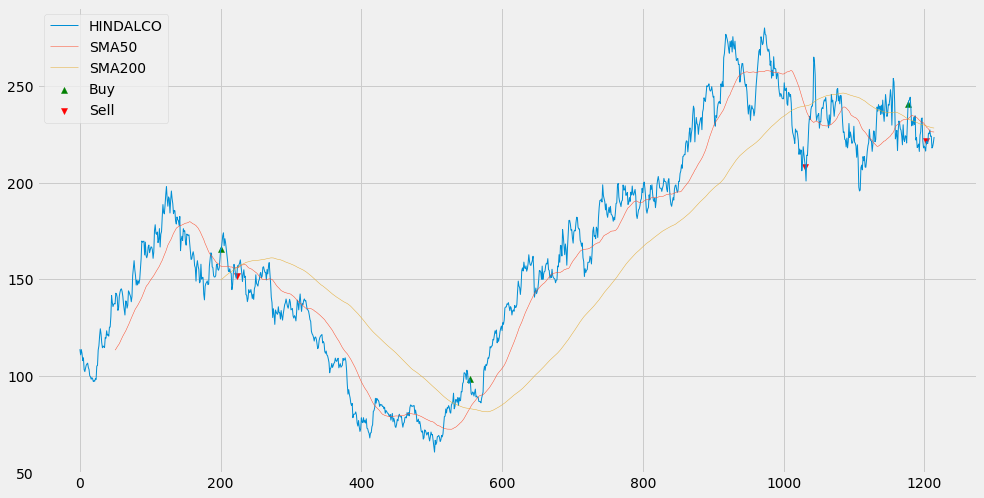

In [52]:
buy_sell = buy_sell_signal(Data)
Data['BuyPrice'] = buy_sell[0]
Data['SellPrice'] = buy_sell[1]
Data['OpenPositions'] = buy_sell[2]
Data['LivePositions'] = Data['OpenPositions'].multiply(Data['Price'])
Data['Funds'] = buy_sell[3]

plt.figure(figsize = (15,8))
plt.plot(Data['Price'] , label = 'HINDALCO', linewidth = 1 )
plt.plot(Data['SMA50'] , label = 'SMA50' , linewidth = 0.5)
plt.plot(Data['SMA200'] , label = 'SMA200' , linewidth = 0.5)
plt.scatter(Data.index, Data['BuyPrice'], label= 'Buy', marker = '^', color = 'g')
plt.scatter(Data.index, Data['SellPrice'], label= 'Sell', marker = 'v', color = 'r')
plt.legend(loc = 'upper left')


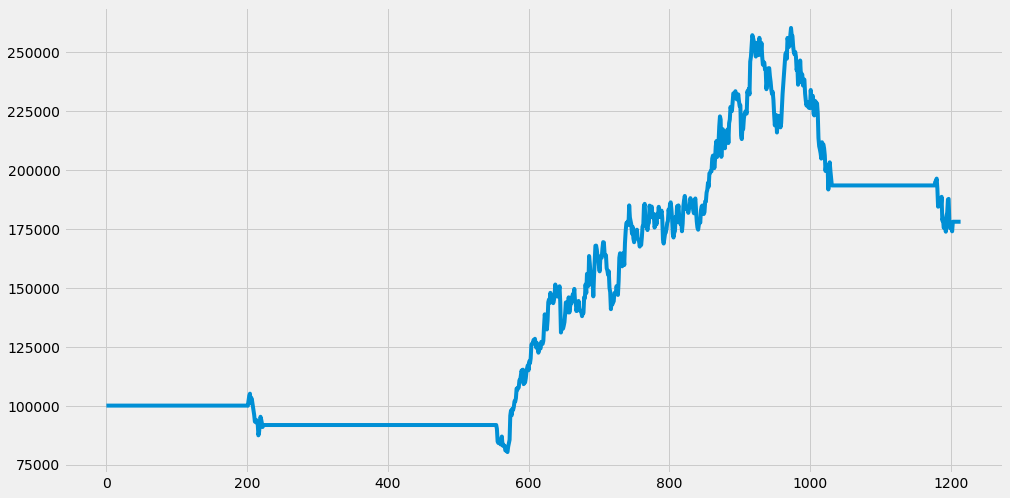

In [53]:
plt.figure(figsize = (15,8))
plt.plot(Data['Funds'])